<a href="https://colab.research.google.com/github/Inyrkz/covid-classifier/blob/main/CXR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Downloading Dataset from kaggle with kaggle username and kaggle key
import os
os.environ['KAGGLE_USERNAME'] = "inyrkz" # username from the json file
os.environ['KAGGLE_KEY'] = "ed79289c859ef6fd86f9fa1bdcc8e710" # key from the json file
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database # api copied from kaggle

 99% 740M/745M [00:04<00:00, 139MB/s]
100% 745M/745M [00:05<00:00, 154MB/s]


In [ ]:
# # unzipping the downloaded dataset
!unzip -uq "/content/covid19-radiography-database.zip" -d "/content"

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import shutil, os
files = ['/content/models/model_0.973.h5', 'fi]
for f in files:
    shutil.move(f, '/content/drive/MyDrive')

SyntaxError: ignored

In [ ]:
if not os.path.isdir('models'):
  os.mkdir('models')

# checking TensorFlow version and GPU usage
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Tensorflow version: 2.6.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [ ]:
# get the directory to each class of images

covid_dir = '/content/Radiography_Dataset/COVID'
viral_pneumo_dir = '/content/Radiography_Dataset/Viral Pneumonia'
normal_dir = '/content/Radiography_Dataset/Normal'

# store the directory to the images in a list
covid_img = [os.path.join(covid_dir, i).format(i) for i in os.listdir(covid_dir) if 'COVID' in i]
viral_pneumo_img = [os.path.join(viral_pneumo_dir, i).format(i) for i in os.listdir(viral_pneumo_dir) if 'Viral' in i]
normal_img = [os.path.join(normal_dir, i).format(i) for i in os.listdir(normal_dir) if 'Normal' in i]

train_imgs = covid_img + viral_pneumo_img + normal_img

# randomize the training data
random.shuffle(train_imgs)

# Get the number of training images
print("Number of COVID images", len(covid_img))
print("Number of viral pneumonia images", len(viral_pneumo_img))
print("Number of normal images",len(normal_img))
print("----------------------------------")
print("Total Number of available images",len(train_imgs))

# del the images list variables
del covid_img
del viral_pneumo_img
del normal_img
gc.collect()

Number of COVID images 3616
Number of viral pneumonia images 1345
Number of normal images 10192
----------------------------------
Total Number of available images 15153


0

['Normal', 'COVID', 'Normal', 'Normal', 'COVID', 'COVID', 'Viral', 'COVID', 'Viral', 'Normal', 'Normal', 'Normal', 'COVID', 'Viral', 'Normal', 'Viral', 'Normal', 'Normal', 'Viral', 'Normal', 'Normal', 'Normal', 'COVID', 'Viral', 'Normal', 'COVID', 'Normal', 'Normal', 'COVID', 'COVID', 'Normal', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'COVID', 'COVID', 'Normal', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'Viral', 'Normal', 'Normal', 'COVID', 'Normal', 'COVID', 'Normal', 'Normal', 'COVID', 'Viral', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Viral', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'COVID', 'Normal', 'Normal', 'Normal', 'Normal', 'COVID', 'N

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Labels for CXR')

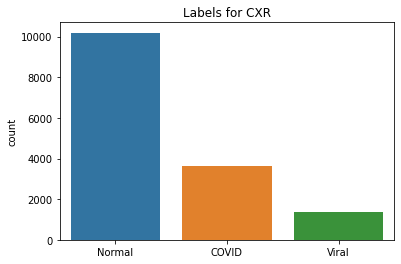

In [ ]:
# Code to get plot of the different classes available
# set images parameters
nrows = 200
ncolumns = 200
channels = 3

def read_and_process_image(list_of_images):
  '''fuction to process the images and assign labels to them based on their classes'''
  X = []
  y = []
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
    if 'COVID' in image:
      y.append('COVID')
    elif 'Normal' in image:
      y.append('Normal')
    elif 'Viral' in image:
      y.append('Viral Pneumonia')

  return X, y

# invoke function
X, y = read_and_process_image(train_imgs)
# print(X[0])
print(y)

import seaborn as sns

# convert images to numpy array
X = np.array(X)
y = np.array(y)

# plot the total number of each target variable
sns.countplot(y)
plt.title('Labels for CXR')


In [ ]:
# set images parameters
nrows = 200
ncolumns = 200
channels = 3

def read_and_process_image(list_of_images):
  '''fuction to process the images and assign labels to them based on their classes'''
  X = []
  y = []
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
    if 'COVID' in image:
      y.append(0)
    elif 'Normal' in image:
      y.append(1)
    elif 'Viral' in image:
      y.append(2)

  return X, y

# invoke function
X, y = read_and_process_image(train_imgs)
print(X[0])
print(y)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 

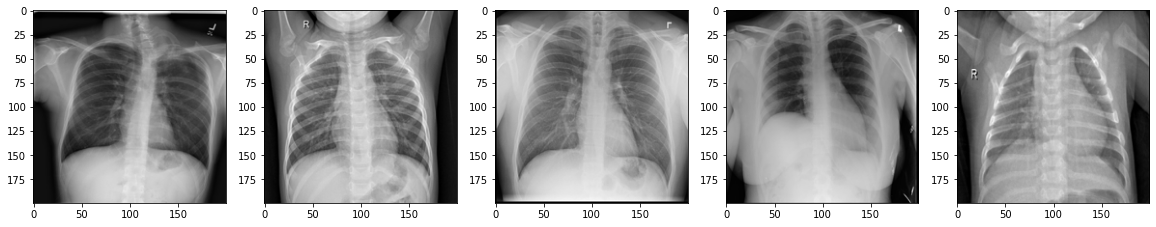

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
  plt.subplot(5/columns + 1, columns, i+1)
  plt.imshow(X[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Labels for CXR')

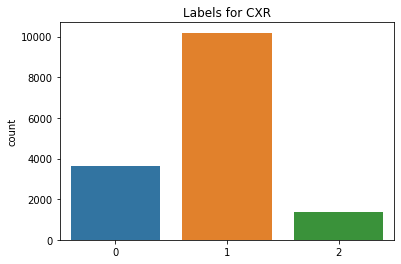

In [ ]:
import seaborn as sns
# remove the train_imgs list, it is no longer needed
del train_imgs
gc.collect()

# convert images to numpy array
X = np.array(X)
y = np.array(y)

# plot the total number of each target variable
sns.countplot(y)
plt.title('Labels for CXR')

In [ ]:
# Get the shape of training images and label
print("Shape of train images is:", X.shape)
print("Shape of label is:", y.shape)

# Split data into train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2,
                                                  stratify=y)

# Get the shape of the splitted data
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of train label is:", y_train.shape)
print("Shape of validation label is:", y_val.shape)

# delete the variables
del X
del y
gc.collect()

Shape of train images is: (15153, 200, 200, 3)
Shape of label is: (15153,)
Shape of train images is: (12122, 200, 200, 3)
Shape of validation images is: (3031, 200, 200, 3)
Shape of train label is: (12122,)
Shape of validation label is: (3031,)


22

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
orig_label = {0: "Covid", 1: "Normal", 2: "Viral"}
frequencies = np.asarray((unique, counts)).T
print("Train Set"); print(frequencies)

Train Set
[[   0 2893]
 [   1 8153]
 [   2 1076]]


In [ ]:
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Test Set"); print(frequencies)

Test Set
[[   0  723]
 [   1 2039]
 [   2  269]]


In [ ]:
# one hot encode the y label since you'll use 4 nodes in output layer
encoded_y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
encoded_y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)
print(encoded_y_train)
print(encoded_y_val)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# Setting CNN hyper-parameters
ntrain =  len(X_train)
nval = len(X_val)
batch_size = 32

# Data Pre-processing and Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Connecting the ImageDataGenerator objects to our dataset
train_generator = train_datagen.flow(X_train, encoded_y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, encoded_y_val, batch_size=batch_size)

In [ ]:
# Building CNN Model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       1

In [ ]:
# Compile the Model
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Train the Model
history = model.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          validation_steps=nval//batch_size,
          steps_per_epoch=ntrain//batch_size,          
          callbacks=[
          # Stopping our training if val_accuracy doesn't improve after 20 epochs
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           patience=20),
          # Saving the best weights of our model in the model directory
        
          # We don't want to save just the weight, but also the model architecture
          tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy'
                                             )
    ])

Epoch 1/100
378/378 [==============================] - 154s 326ms/step - loss: 0.6550 - accuracy: 0.7108 - precision: 0.7282 - recall: 0.6785 - val_loss: 0.6300 - val_accuracy: 0.7111 - val_precision: 0.7430 - val_recall: 0.6516
Epoch 2/100
378/378 [==============================] - 123s 325ms/step - loss: 0.5234 - accuracy: 0.7653 - precision: 0.7791 - recall: 0.7409 - val_loss: 0.4956 - val_accuracy: 0.7842 - val_precision: 0.8038 - val_recall: 0.7643
Epoch 3/100
378/378 [==============================] - 125s 332ms/step - loss: 0.4878 - accuracy: 0.7825 - precision: 0.7928 - recall: 0.7675 - val_loss: 0.4699 - val_accuracy: 0.7819 - val_precision: 0.7889 - val_recall: 0.7739
Epoch 4/100
378/378 [==============================] - 123s 326ms/step - loss: 0.4296 - accuracy: 0.8104 - precision: 0.8162 - recall: 0.8009 - val_loss: 0.3689 - val_accuracy: 0.8334 - val_precision: 0.8374 - val_recall: 0.8251
Epoch 5/100
378/378 [==============================] - 123s 324ms/step - loss: 0.385

In [ ]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

Text(0.5, 0, 'epoch')

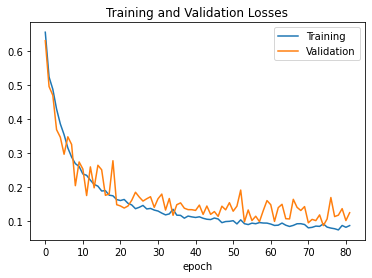

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

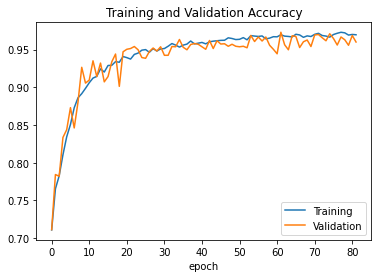

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

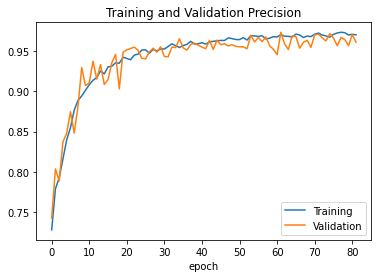

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

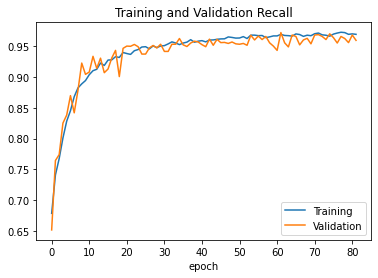

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Recall')
plt.xlabel('epoch')

In [ ]:
# Making a Single Prediction
import numpy as np
from keras.preprocessing import image

# loading the best perfoming model
model = tf.keras.models.load_model('/content/drive/MyDrive/CXR2model_0.890.h5')

# load and resize image to 200x200
test_image = image.load_img('/content/drive/MyDrive/Radiography_Dataset/COVID/COVID-10.png',
                            target_size=(150,150))

test_image1 = image.load_img('/content/drive/MyDrive/Radiography_Dataset/Lung_Opacity/Lung_Opacity-1002.png',
                            target_size=(150,150))

test_image2 = image.load_img('/content/drive/MyDrive/Radiography_Dataset/Normal/Normal-1.png',
                            target_size=(150,150))

test_image3 = image.load_img('/content/drive/MyDrive/Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1.png',
                            target_size=(150,150))

# convert image to numpy array
images = image.img_to_array(test_image1)
# expand dimension of image
images = np.expand_dims(images, axis=0)
# making prediction with model
prediction = model.predict(images)
# print(prediction)    
if prediction[0][0] == 1:
  print('COVID Detected')
elif prediction[0][1] == 1:
  print('Lung Opacity Detected')
elif prediction[0][2] == 1:
  print('Your Result is Normal')
else:
  print("Viral Pneumonia Detected")